# Bem-vindo ao Google Colab!

Neste notebook, você aprenderá os fundamentos da análise de dados usando Python e a biblioteca Pandas.


O banco de dados usado pode ser baixado:

Na nossa pasta do curso: https://drive.google.com/file/d/18Y-9dfJZOqZvUYmrmMxTaLnTYwJbcZrw/view?usp=drive_link


---
## Carregando o arquivo para análise
Primeiramente, nós precisamos fazer o upload dos nossos dados no notebook. \\
1. Clique no ícone de pasta à esquerda. \\
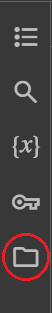
2. No menu que aparecerá, clique no ícone do círculo verde para enviar um arquivo do seu computador. Ou clique no círculo amarelo para conectar ao Google Drive e buscar o arquivo lá.  \\
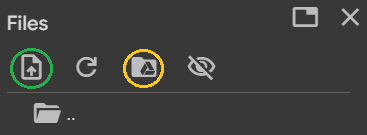

## Carregar base de dados em csv

Para este procedimento, precisamos saber o caminho do nosso arquivo. Se você não souber o caminho, podemos obtê-lo na página **Arquivos** no Google Colab (a mesma que usamos para fazer o upload do arquivo).

1. Clique nos três pontos ao lado do nome do seu arquivo \\
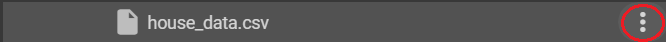 \\
2. Selecione ```Copiar caminho``` \\
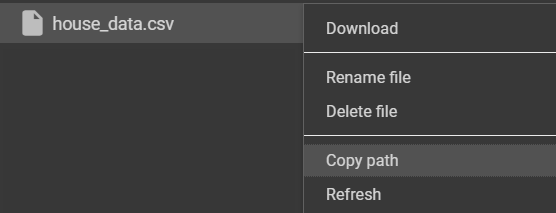

In [ ]:
import pandas as pd

# Carregar o arquivo CSV
caminho_do_meu_arquivo = "/content/car_price_dataset.csv"  # Substitua pelo caminho correto do arquivo
df = pd.read_csv(caminho_do_meu_arquivo)
df.head() # Com esse comando vemos as primeiras 5 linhas do arquivo

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


## Ver quantidade de linhas e colunas da base



In [ ]:
df.shape

(10000, 10)

In [ ]:
# Pode usar o .shape para ver as dimensões do DataFrame.
# O primeiro valor é o número de linhas e o segundo é o número de colunas.
print(f"O DataFrame tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
#print(f"O DataFrame tem {df.shape[2]} linhas e {df.shape[2]} colunas.")

O DataFrame tem 10000 linhas e 10 colunas.


## Ver os Tipos de Dados



In [ ]:
df.dtypes # O método .dtypes retorna o tipo de dado de cada coluna.

,0
Brand,object
Model,object
Year,int64
Engine_Size,float64
Fuel_Type,object
Transmission,object
Mileage,int64
Doors,int64
Owner_Count,int64
Price,int64


## Identificar os Dados Nulos

O comando isna vai mostrar os dados nulos do dataframe

In [ ]:
df.isna().sum() > 0 # Retorna True ou False, se tem valores nulos.

,0
Brand,False
Model,False
Year,False
Engine_Size,False
Fuel_Type,False
Transmission,False
Mileage,False
Doors,False
Owner_Count,False
Price,False


In [ ]:
# Adicionando dados nulos aleatoriamente no dataset
import numpy as np
df_original = df.copy()
maskara = np.random.random(len(df)) <= 0.25  # 25% probabilidade
col = 'Price'
df.loc[maskara, col] = np.nan

In [ ]:
df.isna().sum() > 0 # Retorna True ou False, se tem valores nulos.

,0
Brand,False
Model,False
Year,False
Engine_Size,False
Fuel_Type,False
Transmission,False
Mileage,False
Doors,False
Owner_Count,False
Price,True


In [ ]:
df.isna().sum() # Retorna a quantidade de valores nulos.

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,2542


## Fazer Histograma de uma Coluna

<Axes: >

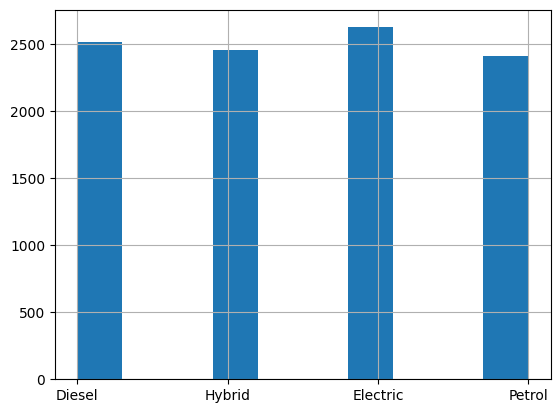

In [ ]:
import matplotlib.pyplot as plt

# Price, Doors, Fuel_Type
df['Fuel_Type'].hist() # O método .hist() para histogramas.


## Filtrar Dados das Colunas



In [ ]:
# Cria uma nova variável (ou sobrescreve a existente) com os dados filtrados.
# A sintaxe é 'df[condição]'.
# Aqui, a condição é 'df['Fuel_Type'] == Electric'.
df_filtrado = df[df['Fuel_Type'] == 'Electric']
df_filtrado

## Calcular Estatística Básica de uma Coluna

In [ ]:
# Calcula estatísticas básicas para a coluna 'release_year'.
# .count(): quantidade de valores não nulos.
# .mean(): média.
# .median(): mediana.
# .std(): desvio padrão.
# .mode(): moda.
coluna = 'Price'
print(f"Estatísticas para a coluna '{coluna}':")
print(f"Quantidade: {df[coluna].count()}")
print(f"Média: {df[coluna].mean():.2f}")
print(f"Mediana: {df[coluna].median()}")
print(f"Desvio Padrão: {df[coluna].std():.2f}")
print(f"Moda: {df[coluna].mode()[0]}")

# Forma de ver dados sumarizados
df.describe()

## Como Substituir Dados Nulos

In [ ]:
# Fazer copia antes
coluna_nula = 'Price'
df_copia_constante = df.copy()

# Substituir por uma constante
df_copia_constante = df_copia_constante.fillna(0)

print(f"Média: {df_copia_constante[coluna_nula].mean():.2f}") # Compare com o original para ver a diferença

df_copia_constante[coluna_nula].hist()

print("Valores nulos =",df_copia_constante[coluna_nula].isna().sum()) # Isso prova que não tem mais valores nulos

In [ ]:
# Fazer copia antes
df_copia_media = df.copy()

# Substituir valores nulos pela média da coluna
df_copia_media[coluna_nula] = df_copia_media[coluna_nula].fillna(df_copia_media[coluna_nula].mean())

print(f"Média: {df_copia_media[coluna_nula].mean():.2f}") # Compare com o original para ver a diferença

df_copia_media[coluna_nula].hist()

print("Valores nulos =",df_copia_media[coluna_nula].isna().sum()) # Isso prova que não tem mais valores nulos

In [ ]:
df_copia_mediana = df.copy()

# Substituir valores nulos pela mediana da coluna
df_copia_mediana[coluna_nula] = df_copia_mediana[coluna_nula].fillna(df_copia_mediana[coluna_nula].median())

print(f"Mediana: {df_copia_mediana[coluna_nula].median()}") # Compare com o original para ver a diferença

df_copia_mediana[coluna_nula].hist()

print("Valores nulos =", df_copia_mediana[coluna_nula].isna().sum()) # Isso prova que não tem mais valores nulos

## Como remover dados nulos


In [ ]:
df_sem_nulos = df.dropna() # O .dropna remove linhas com valores nulos
df_sem_nulos.shape

## Fazer Gráficos de dispersão

In [ ]:
df[coluna_nula] = df[coluna_nula].fillna(df[coluna_nula].mean()) # adicionar o valor da média nos dados nulos
df_menor = df.head(5) # Para facilitar a visualização pegamos apenas 5 primeiros dados do dataframe.
df_menor

In [ ]:
# usamos o plot.scatter para o gráfico de dispersão
plt.figure(figsize=(10, 5))
plt.scatter(df_menor['Price'], df_menor['Doors']) # Gráfico de pontos
plt.show()

In [ ]:
# Grafico completo
plt.figure(figsize=(10, 5))
x = 'Doors' # Year, Doors
y = 'Price'
plt.scatter(df[x], df[y]) # Gráfico de pontos
plt.xlabel(x)
plt.ylabel(y)
plt.show()

## Gráfico de linhas

In [ ]:
# Grafico completo
plt.figure(figsize=(10, 5))
x = 'Year'
y = 'Price'
plt.plot(df[x], df[y]) # Gráfico de linha
plt.xlabel(x)
plt.ylabel(y)
plt.show()

### Agrupando dados para fazer gráfico

In [ ]:
# Primeiro agrupo o dataframe com o .groupby, e conta quantas linhas existem em cada grupo
# Média de avaliação por tipo de aparelho
df_grouped = df.groupby("Year")["Price"].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index, df_grouped.values, marker="o", linestyle="-")
plt.title("Média de preço por ano")
plt.xlabel("Ano")
plt.ylabel("Média de Preço")
plt.grid(True)
plt.show()

## Fazer Gráfico de Colunas

In [ ]:
df_menor = df.head(2) # Para facilitar a visualização pegamos apenas 2 primeiros dados do dataframe.
x = 'Year'
y = 'Price'
plt.figure(figsize=(10,5))
plt.bar(df_menor[x], df_menor[y])
plt.title(f"{x} por {y}")
plt.xlabel(x)
plt.ylabel(y)
plt.show()

In [ ]:
#Agrupa pela coluna anor e pegar a média de preço por ano.
df.groupby(x)[y].mean().plot(kind="bar")

plt.title("Média de preço por ano")
plt.xlabel("Ano")
plt.ylabel("Média de preço")
plt.show()